In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from datetime import datetime 

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.drop(13, 1)

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

Runtime for k-means:
0:00:00.000168


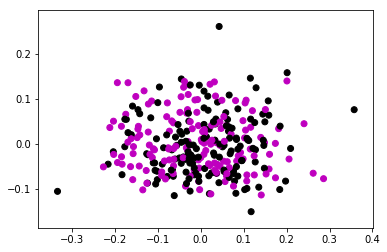

In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=4, random_state=42)
km.fit_predict(X_pca)

startTime = datetime.now()
print('Runtime for k-means:')
print(datetime.now() - startTime)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='km')
plt.show()

In [4]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
 
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for mini batch k-means:')
print(datetime.now() - startTime)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, km))

Runtime for mini batch k-means:
0:00:00.132546
Comparing k-means and mini batch k-means solutions:
col_0  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,\n    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',\n    random_state=42, tol=0.0001, verbose=0)
row_0                                                                                                                                                                                         
0                                                    110                                                                                                                                      
1                                                     66                                                                                                                                      
2                                                     69                                                                                 

In [5]:
km.labels_

array([2, 0, 2, 1, 3, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1,
       3, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 3, 3, 2, 0, 0, 2, 2, 3, 1, 3, 0, 1,
       2, 2, 0, 3, 3, 3, 1, 3, 1, 0, 3, 3, 1, 2, 0, 3, 2, 1, 2, 0, 3, 3, 0,
       2, 2, 1, 0, 1, 3, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 0, 3,
       1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 0, 3, 0, 3, 1, 1, 1, 0, 1, 3, 0, 0,
       2, 3, 3, 0, 2, 1, 0, 1, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 0,
       1, 1, 3, 2, 3, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 3, 3, 1, 1, 3, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 3, 2,
       1, 3, 3, 2, 2, 2, 3, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 3, 0, 3, 0, 0,
       2, 1, 2, 3, 3, 3, 2, 1, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 3, 1, 1, 2, 1,
       3, 0, 3, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 3, 2, 1, 2, 0,
       1, 1, 3, 1, 2, 2, 1, 1, 0, 3, 1, 2, 0, 3, 2, 3, 3, 2, 2, 0, 3, 3, 2,
       1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 2, 1, 3, 1, 2, 0, 3, 3, 2, 3, 2, 2, 0,
       2, 3,

In [6]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

Runtime for k-means:
0:00:00.221577


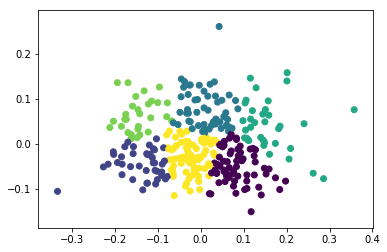

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


In [7]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X_pca)

print('Runtime for k-means:')
print(datetime.now() - startTime)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [8]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for mini batch k-means:')
print(datetime.now() - startTime)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Runtime for mini batch k-means:
0:00:00.362005
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4   5
row_0                        
0       4   0   0  32   0   0
1       0   3   0   0   0  68
2       0  37   0   0   1   0
3       0   1   5   0  28   2
4      56   0   0   0   0   1
5       6   0  49   3   0   7


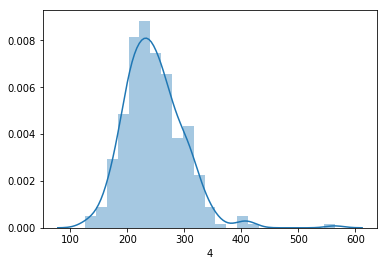

In [9]:
# humps are a visual representation of means

sns.distplot(df[4])

**According to the distplot(), the kernel density estimate (kde) smooths out the humps which are visible at approximately 250, 300, 400 and 580.  This is evidenced in the crosstab if the datapoints are summed for each cluster.**  

**Complexity isn't really an issue. There is a slight inrease in run time between k-means and mini batch k-means, but not enough to limit the number of clusters based on runtime for this dataset.** 